In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
%matplotlib inline
import numpy as np

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
study_results1 = study_results.sort_values("Mouse ID", ascending=False)

In [3]:
study_results1 = study_results1.sort_values('Mouse ID').drop_duplicates(['Mouse ID', 'Timepoint'])

In [4]:
merge_df = pd.merge(mouse_metadata,study_results1, on = "Mouse ID", how = 'outer')

In [5]:
merge_df.tail(5)
             


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
1883     z969     Naftisol  Male           9          30          5   
1884     z969     Naftisol  Male           9          30         30   
1885     z969     Naftisol  Male           9          30         15   
1886     z969     Naftisol  Male           9          30         10   
1887     z969     Naftisol  Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
1883           49.332999                 0  
1884           65.841013                 3  
1885           54.713005                 2  
1886           52.656081                 1  
1887           45.000000                 0

In [6]:
number_of_mice = len(merge_df['Mouse ID'])

In [7]:
number_of_mice

1888

In [8]:
merge_df1 = merge_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

In [9]:
count =merge_df1['Drug Regimen'].value_counts()

In [10]:
count 

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

In [11]:
naftisol_var = merge_df1[merge_df1['Drug Regimen']=='Naftisol']['Tumor Volume (mm3)'].var()

In [12]:
ramicane_var = merge_df1[merge_df1['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)'].var()

In [13]:
capomulin_var = merge_df1[merge_df1['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'].var()


In [14]:
ketapril_var = merge_df1[merge_df1['Drug Regimen']=='Ketapril']['Tumor Volume (mm3)'].var()

In [15]:
zoniferol_var = merge_df1[merge_df1['Drug Regimen']=='Zoniferol']['Tumor Volume (mm3)'].var()

In [16]:
stelasyn_var = merge_df1[merge_df1['Drug Regimen']=='Stelasyn']['Tumor Volume (mm3)'].var()

In [17]:
placebo_var = merge_df1[merge_df1['Drug Regimen']=='Placebo']['Tumor Volume (mm3)'].var()

In [18]:
infubinol_var = merge_df1[merge_df1['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)'].var()

In [19]:
ceftamin_var = merge_df1[merge_df1['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)'].var()

In [20]:
propriva_var = merge_df1[merge_df1['Drug Regimen']=='Propriva']['Tumor Volume (mm3)'].var()

In [21]:
naftisol_sem = merge_df1[merge_df1['Drug Regimen']=='Naftisol']['Tumor Volume (mm3)'].sem()

In [22]:
ramicane_sem = merge_df1[merge_df1['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)'].sem()

In [23]:
capomulin_sem = merge_df1[merge_df1['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'].sem()

In [24]:
ketapril_sem = merge_df1[merge_df1['Drug Regimen']=='Ketapril']['Tumor Volume (mm3)'].sem()

In [25]:
zoniferol_sem = merge_df1[merge_df1['Drug Regimen']=='Zoniferol']['Tumor Volume (mm3)'].sem()

In [26]:
stelasyn_sem = merge_df1[merge_df1['Drug Regimen']=='Stelasyn']['Tumor Volume (mm3)'].sem()

In [27]:
placebo_sem = merge_df1[merge_df1['Drug Regimen']=='Placebo']['Tumor Volume (mm3)'].sem()

In [28]:
infubinol_sem = merge_df1[merge_df1['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)'].sem()

In [29]:
ceftamin_sem = merge_df1[merge_df1['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)'].sem()

In [30]:
propriva_sem = merge_df1[merge_df1['Drug Regimen']=='Propriva']['Tumor Volume (mm3)'].sem()

In [31]:
grouped_regimen = merge_df1.groupby(['Drug Regimen'])

In [32]:
grouped_regimen.describe()


Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  156.0  52.385666  6.573043  45.000000  47.046068   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [33]:
grouped_regimenDF1 = grouped_regimen.describe().loc[:,(slice(None),['mean','50%','std'])]


In [34]:
grouped_regimenDF1 

Tumor Volume (mm3)                     
                           mean       std        50%
Drug Regimen                                        
Capomulin             40.675741  4.994774  41.557809
Ceftamin              52.591172  6.268188  51.776157
Infubinol             52.884795  6.567243  51.820584
Ketapril              55.235638  8.279709  53.698743
Naftisol              54.331565  8.134708  52.509285
Placebo               54.033581  7.821003  52.288934
Propriva              52.385666  6.573043  50.909965
Ramicane              40.216745  4.846308  40.673236
Stelasyn              54.233149  7.710419  52.431737
Zoniferol             53.236507  6.966589  51.818479

In [35]:

grouped_regimenDF1  = grouped_regimenDF1 .rename(columns={"mean": "Mean", "std": "STD",'50%':'Median'})


In [36]:

grouped_regimenDF1

Tumor Volume (mm3)                     
                           Mean       STD     Median
Drug Regimen                                        
Capomulin             40.675741  4.994774  41.557809
Ceftamin              52.591172  6.268188  51.776157
Infubinol             52.884795  6.567243  51.820584
Ketapril              55.235638  8.279709  53.698743
Naftisol              54.331565  8.134708  52.509285
Placebo               54.033581  7.821003  52.288934
Propriva              52.385666  6.573043  50.909965
Ramicane              40.216745  4.846308  40.673236
Stelasyn              54.233149  7.710419  52.431737
Zoniferol             53.236507  6.966589  51.818479

In [37]:
grouped_regimenDF1.columns = grouped_regimenDF1.columns.droplevel(0)


   

In [38]:
grouped_regimenDF1 

Mean       STD     Median
Drug Regimen                                
Capomulin     40.675741  4.994774  41.557809
Ceftamin      52.591172  6.268188  51.776157
Infubinol     52.884795  6.567243  51.820584
Ketapril      55.235638  8.279709  53.698743
Naftisol      54.331565  8.134708  52.509285
Placebo       54.033581  7.821003  52.288934
Propriva      52.385666  6.573043  50.909965
Ramicane      40.216745  4.846308  40.673236
Stelasyn      54.233149  7.710419  52.431737
Zoniferol     53.236507  6.966589  51.818479

In [39]:
grouped_regimenDF1.index


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [40]:
var_semDF = pd.DataFrame({'Variance': [capomulin_var,ceftamin_var,infubinol_var,ketapril_var,naftisol_var,\
                                      placebo_var,propriva_var, ramicane_var, stelasyn_var, zoniferol_var],\
                         'SEM' :[capomulin_sem,ceftamin_sem,infubinol_sem,ketapril_sem,naftisol_sem,\
                                      placebo_sem,propriva_sem, ramicane_sem, stelasyn_sem, zoniferol_sem]},
                          index = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])

In [41]:
var_semDF 

Variance       SEM
Capomulin  24.947764  0.329346
Ceftamin   39.290177  0.469821
Infubinol  43.128684  0.492236
Ketapril   68.553577  0.603860
Naftisol   66.173479  0.596466
Placebo    61.168083  0.581331
Propriva   43.204897  0.526265
Ramicane   23.486704  0.320955
Stelasyn   59.450562  0.573111
Zoniferol  48.533355  0.516398

In [42]:
var_semDF.index.name='Drug Regimen'

In [43]:
summary_statisticsDF = pd.merge(grouped_regimenDF1 ,var_semDF, on = "Drug Regimen", how = 'outer')

In [44]:
summary_statisticsDF

Mean       STD     Median   Variance       SEM
Drug Regimen                                                     
Capomulin     40.675741  4.994774  41.557809  24.947764  0.329346
Ceftamin      52.591172  6.268188  51.776157  39.290177  0.469821
Infubinol     52.884795  6.567243  51.820584  43.128684  0.492236
Ketapril      55.235638  8.279709  53.698743  68.553577  0.603860
Naftisol      54.331565  8.134708  52.509285  66.173479  0.596466
Placebo       54.033581  7.821003  52.288934  61.168083  0.581331
Propriva      52.385666  6.573043  50.909965  43.204897  0.526265
Ramicane      40.216745  4.846308  40.673236  23.486704  0.320955
Stelasyn      54.233149  7.710419  52.431737  59.450562  0.573111
Zoniferol     53.236507  6.966589  51.818479  48.533355  0.516398

In [45]:
summary_statisticsDF1 = grouped_regimen.aggregate(['mean','std','median','var','sem'])

In [46]:
summary_statisticsDF1

Tumor Volume (mm3)                                          
                           mean       std     median        var       sem
Drug Regimen                                                             
Capomulin             40.675741  4.994774  41.557809  24.947764  0.329346
Ceftamin              52.591172  6.268188  51.776157  39.290177  0.469821
Infubinol             52.884795  6.567243  51.820584  43.128684  0.492236
Ketapril              55.235638  8.279709  53.698743  68.553577  0.603860
Naftisol              54.331565  8.134708  52.509285  66.173479  0.596466
Placebo               54.033581  7.821003  52.288934  61.168083  0.581331
Propriva              52.385666  6.573043  50.909965  43.204897  0.526265
Ramicane              40.216745  4.846308  40.673236  23.486704  0.320955
Stelasyn              54.233149  7.710419  52.431737  59.450562  0.573111
Zoniferol             53.236507  6.966589  51.818479  48.533355  0.516398

In [47]:
summary_statisticsDF['Mean']=summary_statisticsDF['Mean'].map('{:.2f}'.format )

In [48]:
summary_statisticsDF['STD']=summary_statisticsDF['STD'].map('{:.2f}'.format )

In [49]:
summary_statisticsDF['Median']=summary_statisticsDF['Median'].map('{:.2f}'.format )

In [50]:
summary_statisticsDF['Variance']=summary_statisticsDF['Variance'].map('{:.2f}'.format )

In [51]:
summary_statisticsDF['SEM']=summary_statisticsDF['SEM'].map('{:.2f}'.format )

In [52]:
summary_statisticsDF

Mean   STD Median Variance   SEM
Drug Regimen                                   
Capomulin     40.68  4.99  41.56    24.95  0.33
Ceftamin      52.59  6.27  51.78    39.29  0.47
Infubinol     52.88  6.57  51.82    43.13  0.49
Ketapril      55.24  8.28  53.70    68.55  0.60
Naftisol      54.33  8.13  52.51    66.17  0.60
Placebo       54.03  7.82  52.29    61.17  0.58
Propriva      52.39  6.57  50.91    43.20  0.53
Ramicane      40.22  4.85  40.67    23.49  0.32
Stelasyn      54.23  7.71  52.43    59.45  0.57
Zoniferol     53.24  6.97  51.82    48.53  0.52

In [53]:
grouped_df= pd.DataFrame(merge_df.groupby(['Drug Regimen']).count()).reset_index()
datapoints = grouped_df[['Drug Regimen', 'Mouse ID']]
datapoints= datapoints.set_index('Drug Regimen')

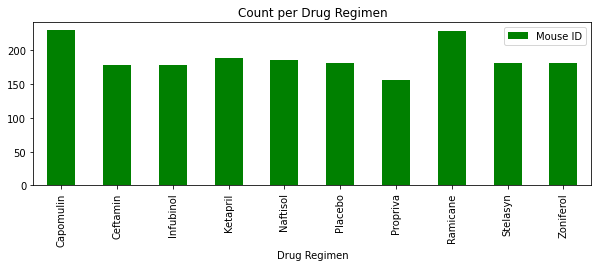

<Figure size 432x288 with 0 Axes>

In [54]:
datapoints.plot(kind = 'bar', figsize =(10,3), color = "g")
plt.title('Count per Drug Regimen')
plt.show()
plt.tight_layout()

In [55]:
drug_regimens = grouped_regimenDF1.index.tolist()

In [56]:
regimen_count = (merge_df.groupby(['Drug Regimen'])['Age_months'].count()).tolist()

In [57]:
regimen_count


[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

In [58]:
x_axis = np.arange(len(regimen_count))

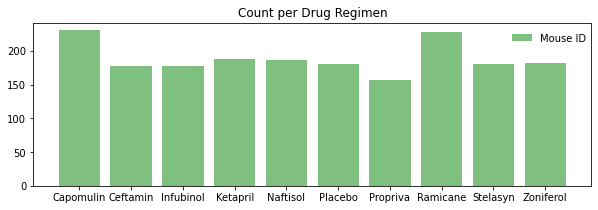

In [59]:
x_axis = drug_regimens
plt.figure(figsize = (10,3))
plt.title('Count per Drug Regimen', fontdict = {'fontsize':12})
plt.bar(x_axis,regimen_count,color = 'g', alpha = 0.5, align = 'center', label = 'Mouse ID')

plt.legend(loc =  (.85,.85), frameon = False)
plt.show()


In [60]:
count = merge_df['Sex'].value_counts()
count

Male      958
Female    930
Name: Sex, dtype: int64

In [61]:

list(merge_df['Sex'].value_counts())


[958, 930]

In [62]:
male = list(merge_df['Sex'].value_counts())[0]
female = list(merge_df['Sex'].value_counts())[1]


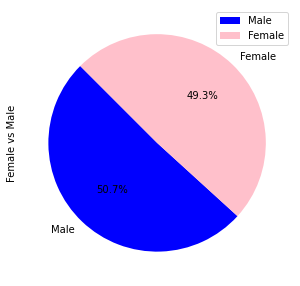

In [63]:
# a pie plot showing the distribution of female versus male mice using Pandas
male_femaleDF = pd.DataFrame({'Female vs Male':[male, female] }, index = ['Male','Female'])                            
                   
                  
plot = male_femaleDF.plot.pie(y = 'Female vs Male',figsize=(5, 5),autopct='%1.1f%%',startangle=135,colors = ['blue','pink'])


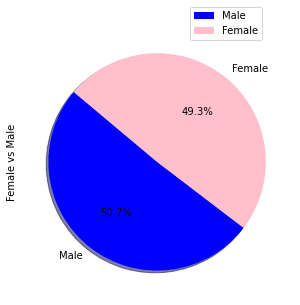

In [64]:
#a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [male, female]

colors = ["blue", "pink"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend( labels,loc = (.62,.95))
plt.ylabel('Female vs Male')
fig = plt.gcf()
fig.set_size_inches(5,5)
#plt.axis("equal")


In [65]:
final_volume = merge_df.loc[merge_df["Timepoint"]==45]

In [66]:
final_volume


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1        k403     Ramicane    Male          21          16         45   
16       s185    Capomulin  Female           3          17         45   
25       x401    Capomulin  Female          16          15         45   
31       m601    Capomulin    Male          22          17         45   
45       g791     Ramicane    Male          11          16         45   
...       ...          ...     ...         ...         ...        ...   
1840     y769     Ceftamin  Female           6          27         45   
1849     y865     Ceftamin    Male          23          26         45   
1864     z581    Infubinol  Female          24          25         45   
1869     z795     Naftisol  Female          13          29         45   
1879     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
1              22.050126                 1  
16             23.343598                 1  
25             28.484033                 0  
31             28.430964                 1  
45             29.128472                 1  
...                  ...               ...  
1840           68.594745                 4  
1849           64.729837                 3  
1864           62.754451                 3  
1869           65.741070                 3  
1879           73.867845                 4  

[130 rows x 8 columns]

In [67]:
capumulin_data_df = final_volume[final_volume['Drug Regimen'].isin(['Capomulin'])]
capumulin_data_df.head().reset_index()
capumulin_data_df1 = capumulin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capumulin_list = capumulin_data_df1["Tumor Volume (mm3)"].tolist()

In [68]:
ramicane_data_df = final_volume[final_volume['Drug Regimen'].isin(['Ramicane'])]
ramicane_data_df.head().reset_index()
ramicane_data_df1 = ramicane_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_list =ramicane_data_df1["Tumor Volume (mm3)"].tolist()

In [69]:
infubinol_data_df = final_volume[final_volume['Drug Regimen'].isin(['Infubinol'])]
infubinol_data_df.head().reset_index()
infubinol_data_df1 = infubinol_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infubinol_list =infubinol_data_df1["Tumor Volume (mm3)"].tolist()

In [70]:
ceftamin_data_df = final_volume[final_volume['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_data_df.head().reset_index()
ceftamin_data_df1 = ceftamin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_list = ceftamin_data_df1["Tumor Volume (mm3)"].tolist()

In [71]:
infubinol_data = np.array(infubinol_list)
q3, q1 = np.percentile(infubinol_data, [75 ,25])
iqr_infubinol =q3 - q1
iqr_infubinol

4.9311172099999965

In [72]:
ceftamin_data = np.array(ceftamin_list)
a3, a1 = np.percentile(ceftamin_data, [75 ,25])
iqr_ceftamin =a3 - a1
iqr_ceftamin

6.093590140000003

In [73]:
ramicane_data = np.array(ramicane_list)
b3, b1 = np.percentile(ramicane_data, [75 ,25])
iqr_ramicane =b3 - b1
iqr_ramicane

7.527130082499998

In [74]:
capumulin_data = np.array(capumulin_list)
c3, c1 = np.percentile(capumulin_data, [75 ,25])
iqr_capumulin=c3 - c1
iqr_capumulin

7.781863460000004

In [75]:
capumulin_data_df.head().reset_index()


index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     16     s185    Capomulin  Female           3          17         45   
1     25     x401    Capomulin  Female          16          15         45   
2     31     m601    Capomulin    Male          22          17         45   
3    103     u364    Capomulin    Male          18          17         45   
4    121     y793    Capomulin    Male          17          17         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           23.343598                 1  
1           28.484033                 0  
2           28.430964                 1  
3           31.023923                 3  
4           31.896238                 2

In [76]:
lower_bound_infubinol = q1-(1.5*iqr_infubinol)
upper_bound_infubinol =q3+(1.5*iqr_infubinol)

In [77]:
lower_bound_ceftamin = a1-(1.5*iqr_ceftamin)
upper_bound_ceftamin = a3+(1.5*iqr_ceftamin)

In [78]:
lower_bound_ramicane = b1-(1.5*iqr_ramicane)
upper_bound_ramicane = b3+(1.5*iqr_ramicane)

In [79]:
lower_bound_capumulin = b1-(1.5*iqr_capumulin)
upper_bound_capumulin = b3+(1.5*iqr_capumulin)

In [80]:
outliers_df_infubinol = infubinol_data_df.loc[(infubinol_data_df['Tumor Volume (mm3)'] > upper_bound_infubinol) |(infubinol_data_df['Tumor Volume (mm3)']<lower_bound_infubinol),:]
outliers_df_infubinol

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

In [81]:
outliers_df_ceftamin = ceftamin_data_df.loc[(ceftamin_data_df['Tumor Volume (mm3)'] > upper_bound_ceftamin) |(ceftamin_data_df['Tumor Volume (mm3)']<lower_bound_ceftamin),:]
outliers_df_ceftamin

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

In [82]:
outliers_df_ramicane = ramicane_data_df.loc[(ramicane_data_df['Tumor Volume (mm3)'] > upper_bound_ramicane) |(ramicane_data_df['Tumor Volume (mm3)']<lower_bound_ramicane),:]
outliers_df_ramicane

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

In [83]:
outliers_df_capumulin = capumulin_data_df.loc[(capumulin_data_df['Tumor Volume (mm3)'] > upper_bound_capumulin) |(capumulin_data_df['Tumor Volume (mm3)']<lower_bound_capumulin),:]
outliers_df_capumulin

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

[Text(1, 0, 'Ceftamin'),
 Text(2, 0, 'Infubinol'),
 Text(3, 0, 'Ramicane'),
 Text(4, 0, 'Capumulin')]

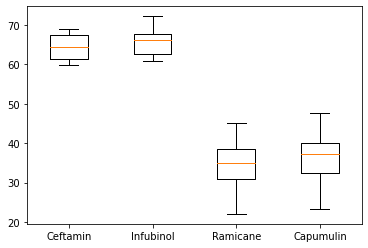

In [84]:
my_dict = {'Ceftamin': ceftamin_list, 'Infubinol': infubinol_list, 'Ramicane' :ramicane_list,'Capumulin':capumulin_list}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

In [85]:
capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.tail()

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
225    440     i557    Capomulin  Female           1          24         15   
226   1447     r157    Capomulin    Male          22          25         15   
227   1448     r157    Capomulin    Male          22          25          5   
228   1449     r157    Capomulin    Male          22          25          0   
229   1450     r157    Capomulin    Male          22          25         10   

     Tumor Volume (mm3)  Metastatic Sites  
225           43.529876                 0  
226           46.539206                 0  
227           45.597064                 0  
228           45.000000                 0  
229           46.059608                 0

In [86]:
capomulin_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
capomulin_mouse_df

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
216    431     i557    Capomulin  Female           1          24         40   
217    432     i557    Capomulin  Female           1          24         35   
218    433     i557    Capomulin  Female           1          24         10   
219    434     i557    Capomulin  Female           1          24         30   
220    435     i557    Capomulin  Female           1          24         25   
221    436     i557    Capomulin  Female           1          24          0   
222    437     i557    Capomulin  Female           1          24          5   
223    438     i557    Capomulin  Female           1          24         20   
224    439     i557    Capomulin  Female           1          24         45   
225    440     i557    Capomulin  Female           1          24         15   

     Tumor Volume (mm3)  Metastatic Sites  
216           46.821070                 1  
217           45.941949                 0  
218           42.992077                 0  
219           45.261384                 0  
220           44.596219                 0  
221           45.000000                 0  
222           42.261665                 0  
223           43.967895                 0  
224           47.685963                 1  
225           43.529876                 0

In [87]:
capomulin_mouse_df = capomulin_mouse_df.loc[ :,["Timepoint", "Tumor Volume (mm3)"]]

In [88]:
capomulin_mouse_df=capomulin_mouse_df.reset_index(drop=True)

<AxesSubplot:xlabel='Timepoint'>

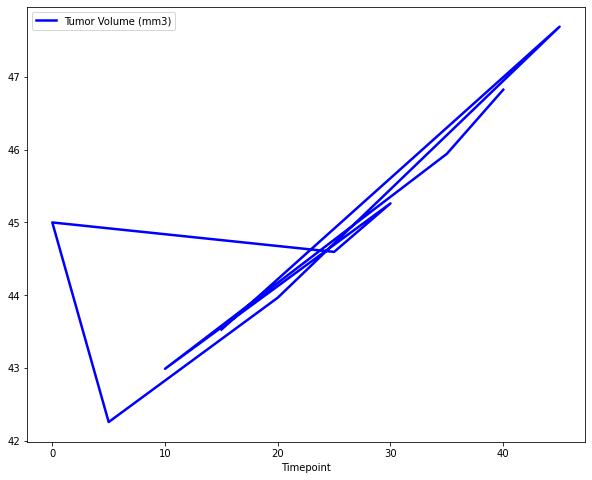

In [89]:
capomulin_mouse_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue')

In [90]:
capomulin_df_new = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_df_new

Mouse ID  Weight (g)  Tumor Volume (mm3)
0       s185          17           43.878496
1       s185          17           32.959671
2       s185          17           25.472143
3       s185          17           28.328531
4       s185          17           45.000000
..       ...         ...                 ...
225     i557          24           43.529876
226     r157          25           46.539206
227     r157          25           45.597064
228     r157          25           45.000000
229     r157          25           46.059608

[230 rows x 3 columns]

In [91]:
average_tumor_volume = pd.DataFrame(capomulin_df_new.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_tumor_volume.head()

Mouse ID  Weight (g)  Tumor Volume (mm3)
0     b128          22           41.963636
1     b742          21           40.083699
2     f966          17           36.505973
3     g288          19           41.990097
4     g316          22           44.613344

In [92]:
average_tumor_volume = average_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_tumor_volume.head()

Mouse ID  Weight (g)  Average Volume
0     b128          22       41.963636
1     b742          21       40.083699
2     f966          17       36.505973
3     g288          19       41.990097
4     g316          22       44.613344

In [93]:
average_tumor_volume = average_tumor_volume.set_index('Mouse ID')

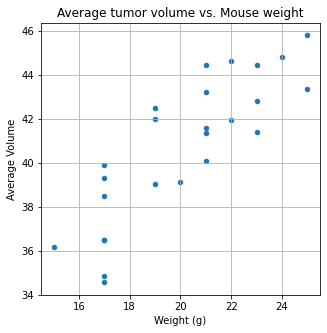

In [94]:
average_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(5,5),
              title="Average tumor volume vs. Mouse weight")
plt.show()

In [95]:
mouse_weight = average_tumor_volume.iloc[:,0]
avg_tumor_volume = average_tumor_volume.iloc[:,1]
correlation = mouse_weight.corr(avg_tumor_volume)
correlation

0.8419363424694721

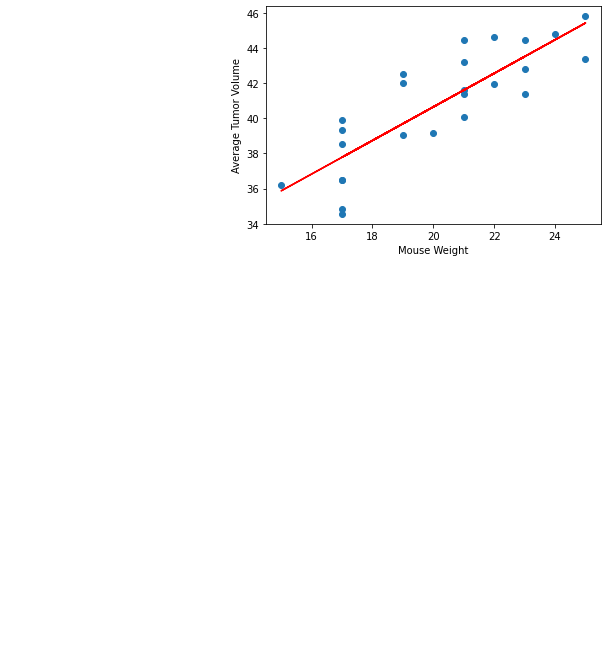

In [96]:
x_values = average_tumor_volume['Weight (g)']
y_values = average_tumor_volume['Average Volume']
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()